<a href="https://colab.research.google.com/github/Apekshya-Shakya/TECH405/blob/main/Week6_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
preatcher_standard_ocr_dataset_path = kagglehub.dataset_download('preatcher/standard-ocr-dataset')

print('Data source import complete.')


100%|██████████| 46.2M/46.2M [00:02<00:00, 17.5MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
import cv2
import numpy as np

images = []
labels = []


path = preatcher_standard_ocr_dataset_path

path = os.path.join(path, 'data', 'training_data')

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

In [3]:
X = np.array(images)
len(X)

20628

In [4]:
X.shape

(20628, 64, 64, 3)

In [5]:
y = np.array(labels)
len(y)

20628

In [6]:
y.shape

(20628,)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 64s 93ms/step - accuracy: 0.5674 - loss: 1.6179 - val_accuracy: 0.9227 - val_loss: 0.2686
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9366 - loss: 0.2225 - val_accuracy: 0.9355 - val_loss: 0.2245
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9534 - loss: 0.1351 - val_accuracy: 0.9404 - val_loss: 0.1984
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9636 - loss: 0.1029 - val_accuracy: 0.9450 - val_loss: 0.1842
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.9674 - loss: 0.0852 - val_accuracy: 0.9530 - val_loss: 0.1667
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 88s 102ms/step - accuracy: 0.9746 - loss: 0.0668 - val_accuracy: 0.9426 - val_loss: 0.2009
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 76s 93ms/step - accuracy: 0.9717 - loss: 0.0766 - val_accuracy: 0.9510 - val_loss: 0.1988
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.9815 - loss: 0.0463 -

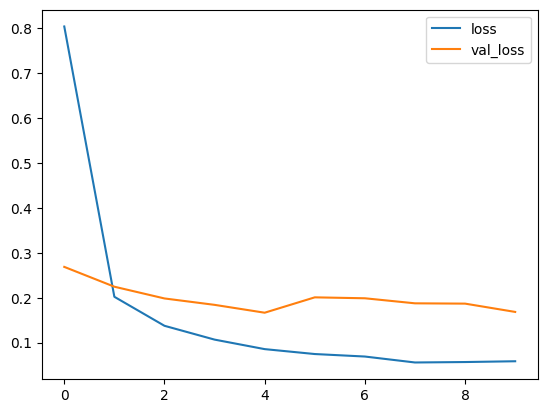

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [15]:
test_images = []
test_labels = []

path = preatcher_standard_ocr_dataset_path  # This assumes preatcher_standard_ocr_dataset_path holds the correct dataset path

# If the data is in a subfolder within the downloaded dataset, adjust the path accordingly
path = os.path.join(path, 'data', 'testing_data')

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)


In [16]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9919 - loss: 0.0464


In [19]:
print(test_loss,test_accuracy )

0.054594479501247406 0.9811508059501648
